# Project Machine Learning: Klasifikasi Penyakit Liver Menggunakan Decision Tree dan Neural Network

## Latar Belakang
Penyakit liver merupakan salah satu penyakit serius yang dapat mempengaruhi fungsi vital tubuh manusia, seperti detoksifikasi, metabolisme, dan produksi protein. Deteksi dini penyakit liver sangat penting karena sering kali gejalanya tidak muncul hingga kondisi sudah parah. Dengan menggunakan model machine learning, kita dapat mengklasifikasikan apakah seseorang memiliki risiko penyakit liver berdasarkan sejumlah indikator hasil pemeriksaan laboratorium.

## Tujuan
Proyek ini bertujuan untuk mengembangkan model klasifikasi penyakit liver menggunakan algoritma klasifikasi seperti Decision Tree dan Neural Network. Model ini diharapkan mampu membantu proses skrining awal terhadap pasien yang memiliki indikasi awal penyakit liver, sehingga penanganan medis bisa dilakukan lebih cepat dan tepat.

1. Upload Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Liver Patient Dataset (LPD)_train.csv to Liver Patient Dataset (LPD)_train.csv


2. Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

3. Load Dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/UAS_AI/Liver Patient Dataset (LPD)_train.csv", encoding='latin1')

4. Data Understanding

In [5]:
print("\n--- Info Data ---")
print(data.info())


--- Info Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
d

In [6]:
print("\n--- Deskripsi Data ---")
print(data.describe())


--- Deskripsi Data ---
       Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        30689.000000     30043.000000      30130.000000   
mean            44.107205         3.370319          1.528042   
std             15.981043         6.255522          2.869592   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.700000          1.300000   
max             90.000000        75.000000         19.700000   

        Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
count                   29895.000000                    30153.000000   
mean                      289.075364                       81.488641   
std                       238.537589                      182.158850   
min                        63.000000                       10.000000   
25%                       175.000000   

5. Exploratory Data Analysis (EDA)

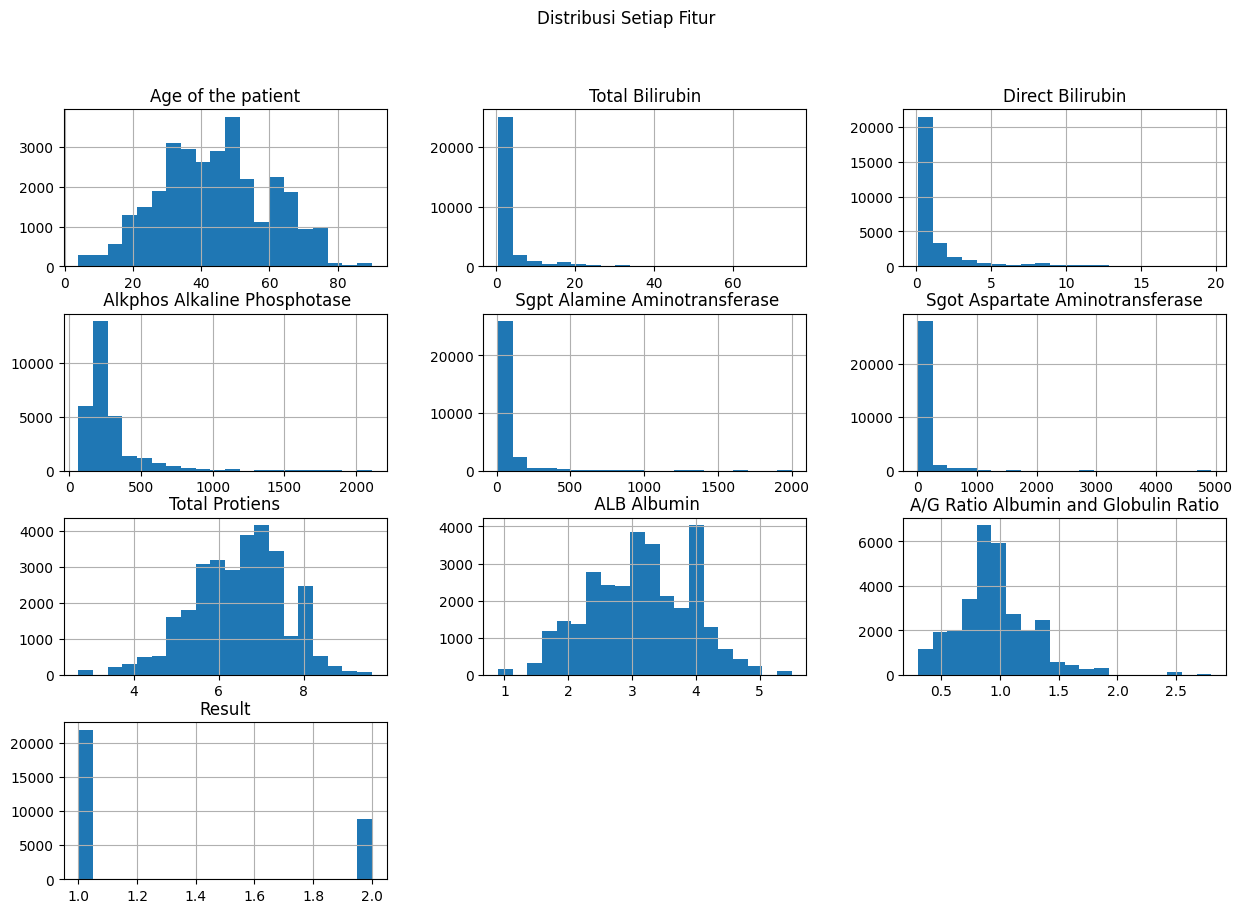

In [7]:
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Setiap Fitur")
plt.show()

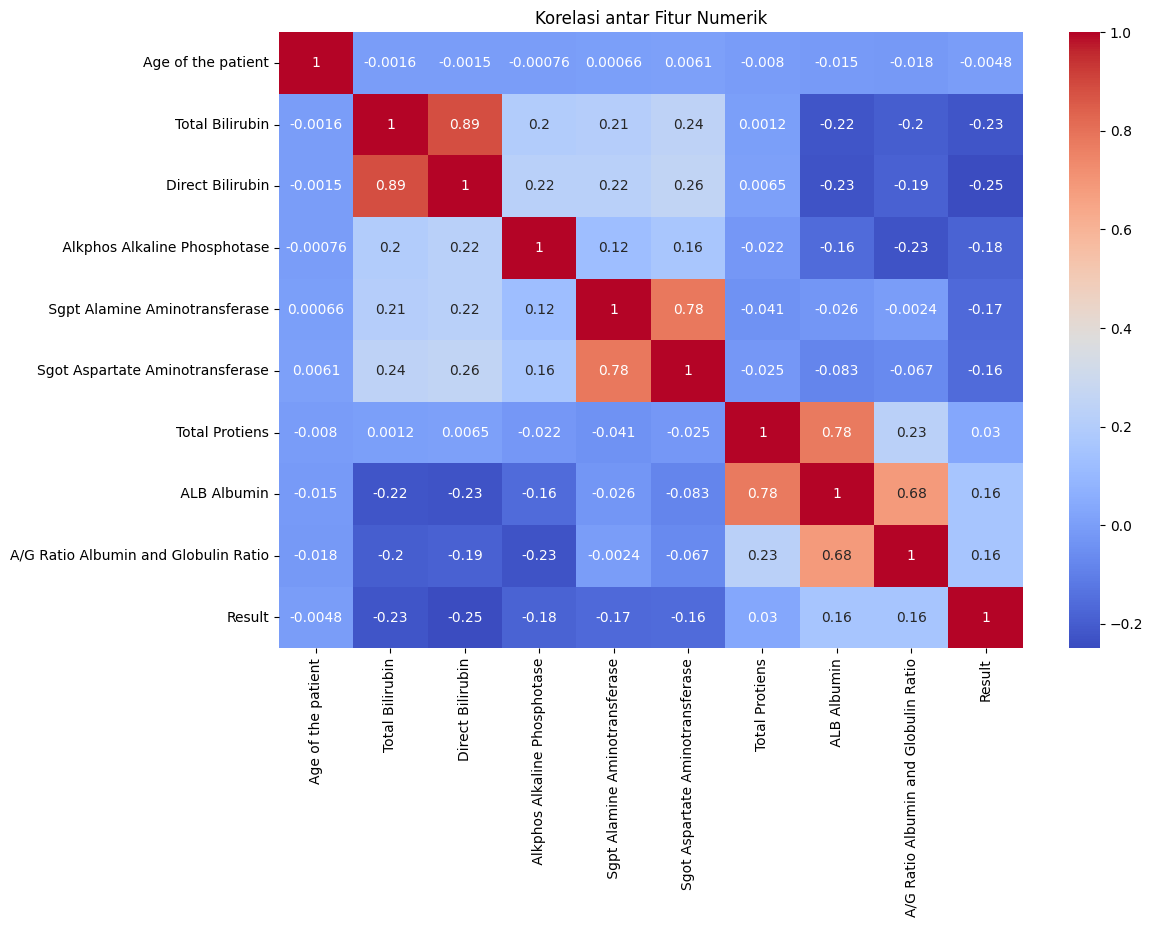

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

In [9]:
print("\n--- Jumlah Kelas ---")
print(data.iloc[:, -1].value_counts())


--- Jumlah Kelas ---
Result
1    21917
2     8774
Name: count, dtype: int64


6. Data Preparation

In [10]:
# Menghapus baris dengan nilai null
data = data.dropna()

In [11]:
# Fitur dan target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
print(X.dtypes)

Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
dtype: object


In [13]:
# Normalisasi
scaler = StandardScaler()
X['Gender of the patient'] = X['Gender of the patient'].map({'Male': 1, 'Female': 0})
X_scaled = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

7. Modeling

In [15]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(8,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8,), max_iter=500, random_state=42)

8. Evaluation

In [17]:
# Decision Tree
print("\n--- Decision Tree Evaluation ---")
y_pred_dt = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


--- Decision Tree Evaluation ---
[[3900    0]
 [   1 1531]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3900
           2       1.00      1.00      1.00      1532

    accuracy                           1.00      5432
   macro avg       1.00      1.00      1.00      5432
weighted avg       1.00      1.00      1.00      5432



In [18]:
# Neural Network
print("\n--- Neural Network Evaluation ---")
y_pred_nn = nn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


--- Neural Network Evaluation ---
[[3414  486]
 [ 824  708]]
              precision    recall  f1-score   support

           1       0.81      0.88      0.84      3900
           2       0.59      0.46      0.52      1532

    accuracy                           0.76      5432
   macro avg       0.70      0.67      0.68      5432
weighted avg       0.75      0.76      0.75      5432



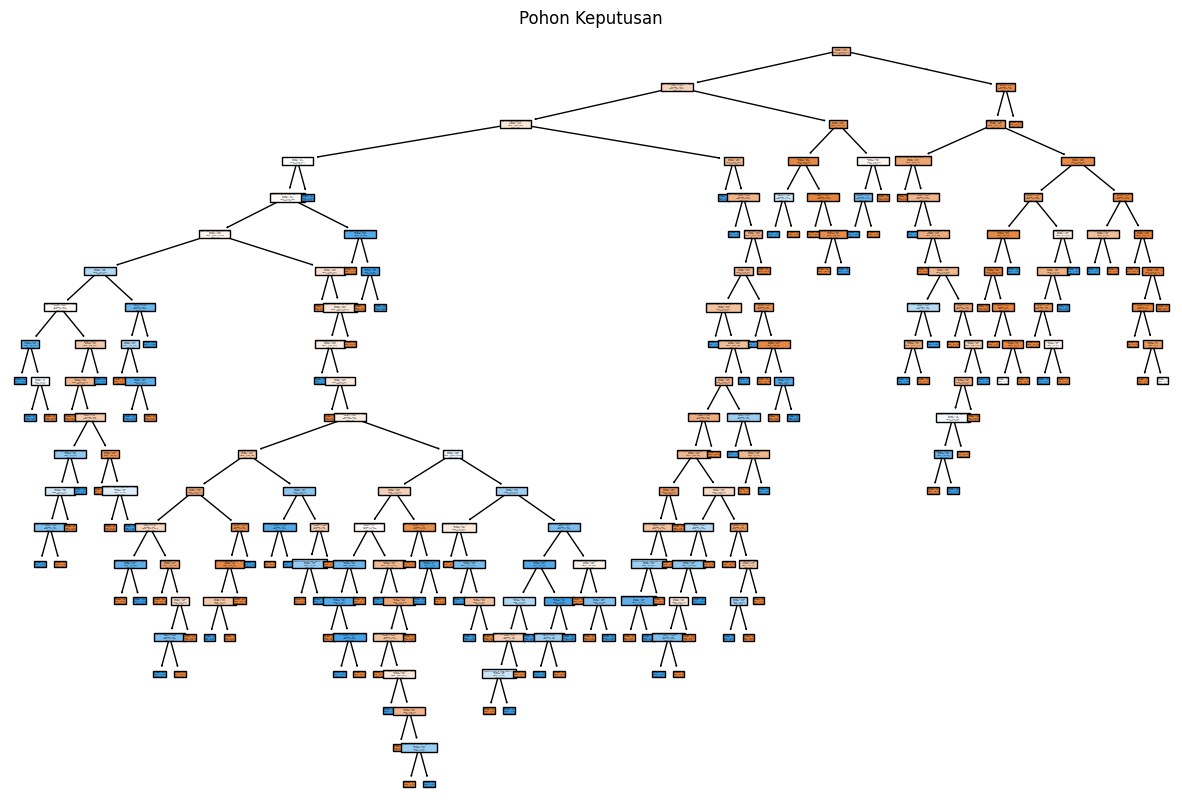

In [19]:
# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=data.columns[:-1], class_names=True)
plt.title("Pohon Keputusan")
plt.show()